<a href="https://colab.research.google.com/github/pazambrano/Aprendizaje-Automatico-Inicial/blob/main/Examen01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Examen 01
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido: Pablo Zambrano &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
# <font color='264CC7'> Indicaciones </font>

- En esta actividad se evalúa si el estudiante *(Criterio 2.1) Emplea modelos de aprendizaje no supervisado, realizando un análisis crítico de su rendimiento y aplicabilidad en diferentes contextos*.
- En caso de considerar que existe un error en alguna pregunta o que esta se encuentra mal planteada, se debe indicar cuál es el error y justificarlo.
- Todas las soluciones deben estar correctamente redactadas, comentadas y explicadas.
- Se asignarán 4 puntos por **«Buen código»** y 4 puntos por **«Buen formato»**.
- Se calificará **únicamente hasta la celda que compile** al ejecutar «Run All».
- Es posible utilizar cualquier material del curso. Sin embargo, no se puede colaborar, comunicarse ni compartir material con otras personas.
- Está permitido utilizar internet para buscar información, pero no está permitido utilizar redes sociales, foros, grupos, chats o similares para solicitar ayuda.
- En todos los lugares donde se requiera una semilla aleatoria, utiliza los últimos **dos dígitos de tu cédula**. Escribe tu número de cédula aquí:
- Se permite el uso de herramientas de IA (por ejemplo, ChatGPT) como apoyo para redacción, depuración y generación de ideas. Sin embargo:
    - Si utilizas IA, debes incluir al final del cuaderno una bitácora de uso de IA (herramienta, objetivo, prompt resumido, verificación propia y correcciones/decisiones).
    - Se podrá descontar hasta <strong>20 puntos</strong> por <strong>«Exceso de uso de IA»</strong> cuando, a criterio del docente, exista evidencia de un uso inadecuado (por ejemplo, respuestas no verificadas, código no comprendido, análisis genérico o incongruente con los resultados).
    - el puntaje descontado podrá recuperarse si el estudiante prepara y presenta una <strong>exposición detallada</strong> que demuestre su comprensión total del contenido generado por IA, explicación del código línea por línea (qué hace, por qué se usa y qué salida produce), justificación del análisis presentado.

---
# <font color='264CC7'> Introducción </font>

A lo largo de esta examne veremos como aplicar distintas técnicas de aprendizaje no supervisado así como algunas de sus aplicaciones reales:

 - **[Métodos de *clustering*](#ej1):** 17 puntos
 - **[Ejemplo práctico](#ej2):** 25 puntos

Para ello vamos a necesitar las siguientes librerías (no se deben agregar más librerías):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

---
<a id="ej1"></a>
# <font color='264CC7'> Métodos de *clustering* (17 puntos) </font>


Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

## <font color='264CC7'> Datos </font>

El conjunto de datos tiene 2 variables (columnas) organizadas en la matriz *X_circles* y tantas filas como muestras.

El objetivo es identificar las estructuras latentes presentes en los datos mediante distintas técnicas de *clustering*.

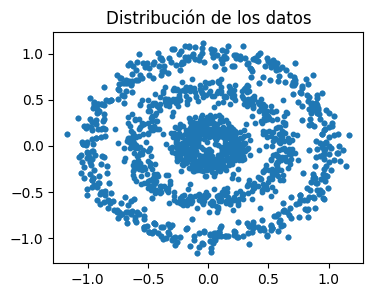

In [4]:

# 1750116517
X_circles1, _ = make_circles(
    n_samples=1000,
    factor=0.6,
    noise=0.07,
    random_state=17)
X_circles2, _ = make_circles(
    n_samples=1000,
    factor=0.2,
    noise=0.07,
    random_state=17)

# Juntamos los datos en un solo conjunto.
X_circles = np.vstack((X_circles1, X_circles2))

# Graficamos los datos.
plt.figure(figsize=(4, 3))
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=10)
plt.title('Distribución de los datos')
plt.show()

## <font color='264CC7'> k-Means Clustering (4 puntos) </font>

### <font color='264CC7'> Parte 1: Determinación del número de clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Aplica el método del codo utilizando la inercia y la silueta promedio para determinar el número óptimo de clústeres:
<ul>
<li>Calcula la inercia para valores de k de 2 a 10 y grafica la inercia frente al número de clústeres.</li>
<li>Calcula la silueta promedio para valores de k de 2 a 10 y grafica la silueta promedio frente al número de clústeres.</li>
<li>Identifica visualmente el punto del "codo" en cada gráfica y justifica tu elección desde una perspectiva matemática y conceptual.</li>
</ul>
</div>

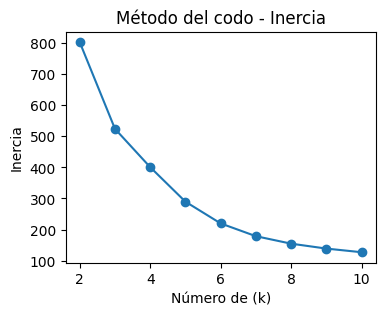

In [14]:
inercias = []
valores_k = range(2, 11)
for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=17)
    kmeans.fit(X_circles)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(4, 3))
plt.plot(valores_k, inercias, marker='o')
plt.xlabel('Número de (k)')
plt.ylabel('Inercia')
plt.title('Método del codo - Inercia')
plt.show()


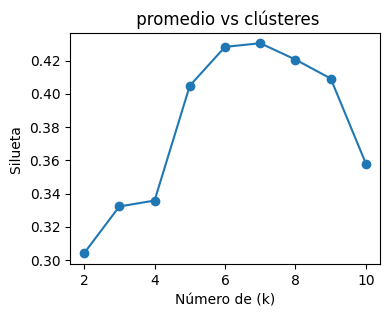

In [13]:
siluetas = []
for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=17)
    etiquetas = kmeans.fit_predict(X_circles)
    siluetas.append(silhouette_score(X_circles, etiquetas))
plt.figure(figsize=(4, 3))
plt.plot(valores_k, siluetas, marker='o')
plt.xlabel('Número de (k)')
plt.ylabel('Silueta ')
plt.title(' promedio vs clústeres')
plt.show()


El numero de k clusters se identifica por escoger el valor para el cual este raccionaria bajando o minimizando su inercia y lo que seria mazimizando la silueta prmedio, el codo viene a medir cuando la inercia viene a ser insignificativa y la silueta mide la calidad global del mismo.

### <font color='264CC7'> Evaluación crítica del método </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Entrena un modelo de K-Means con el número de clústeres seleccionado. Luego:
<ul>
<li>Grafica los datos coloreados según la asignación de clúster.</li>
<li>Explica si el modelo ha logrado identificar la estructura natural de los datos. ¿Qué limitaciones observas en el resultado?</li>
<li>Reflexiona sobre las condiciones geométricas bajo las cuales K-Means funciona adecuadamente y por qué podría no ser el algoritmo más adecuado para este tipo de distribución.</li>
</ul>
</div>

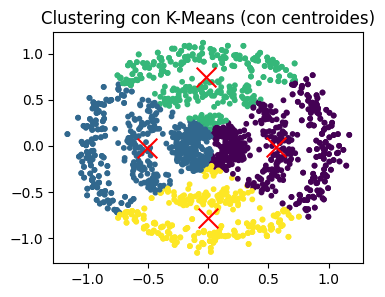

In [27]:
k_sel = 4
kmeans = KMeans(n_clusters=k_sel, random_state=17)
etiquetas_kmeans = kmeans.fit_predict(X_circles)

centroides = kmeans.cluster_centers_
plt.figure(figsize=(4, 3))
plt.scatter(
    X_circles[:, 0],
    X_circles[:, 1],
    c=etiquetas_kmeans,
    s=10)

plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    c='red',
    s=200,
    marker='x')

plt.title('Clustering con K-Means (con centroides)')
plt.show()



Si mi modelo logra identificar completamente la estructura de mis datos es aun no ya que una de las limitaciones que se pueden observar en este resultado es que los clusters no cuentan con una forma de anillo si no de una forma de rebanada lo que resumiria que no nos esta dividiendo en circulos sino esta en regiones.
Es por eso que mi k means funcionaria bien si mi cluster es moderadamente esferico ya que por lo que se entiende en uno de los conceptos principales es que un cluster se mueve por su varianza intra cluster y es por eso que en este caso el algoritmo no logra detectar la forma adecuada de mis datos.

---
## <font color='264CC7'> Agrupamiento Jerárquico (5 puntos) </font>

### <font color='264CC7'> Análisis comparativo de criterios de enlace </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Realiza un análisis exhaustivo de agrupamiento jerárquico utilizando distintos criterios de enlace:
<ul>
  <li>Define una lista de métodos de enlace: <code>'single'</code>, <code>'complete'</code>, <code>'average'</code>, <code>'ward'</code>.</li>
  <li>Para cada criterio, ejecuta los siguientes pasos:
    <ul>
      <li>Aplica el algoritmo de clustering jerárquico a los datos.</li>
      <li>Segmenta el dataset en tres clústeres utilizando un umbral adecuado en el dendrograma.</li>
      <li>Visualiza, para cada criterio:
        <ul>
          <li>Un gráfico de dispersión de los datos coloreados por clúster.</li>
          <li>El dendrograma correspondiente, señalando visualmente el corte realizado.</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Organiza todas las visualizaciones en un único conjunto de subplots, con dos columnas (gráfico de dispersión / dendrograma) y cuatro filas (uno por cada método de enlace).</li>
</ul>
</div>


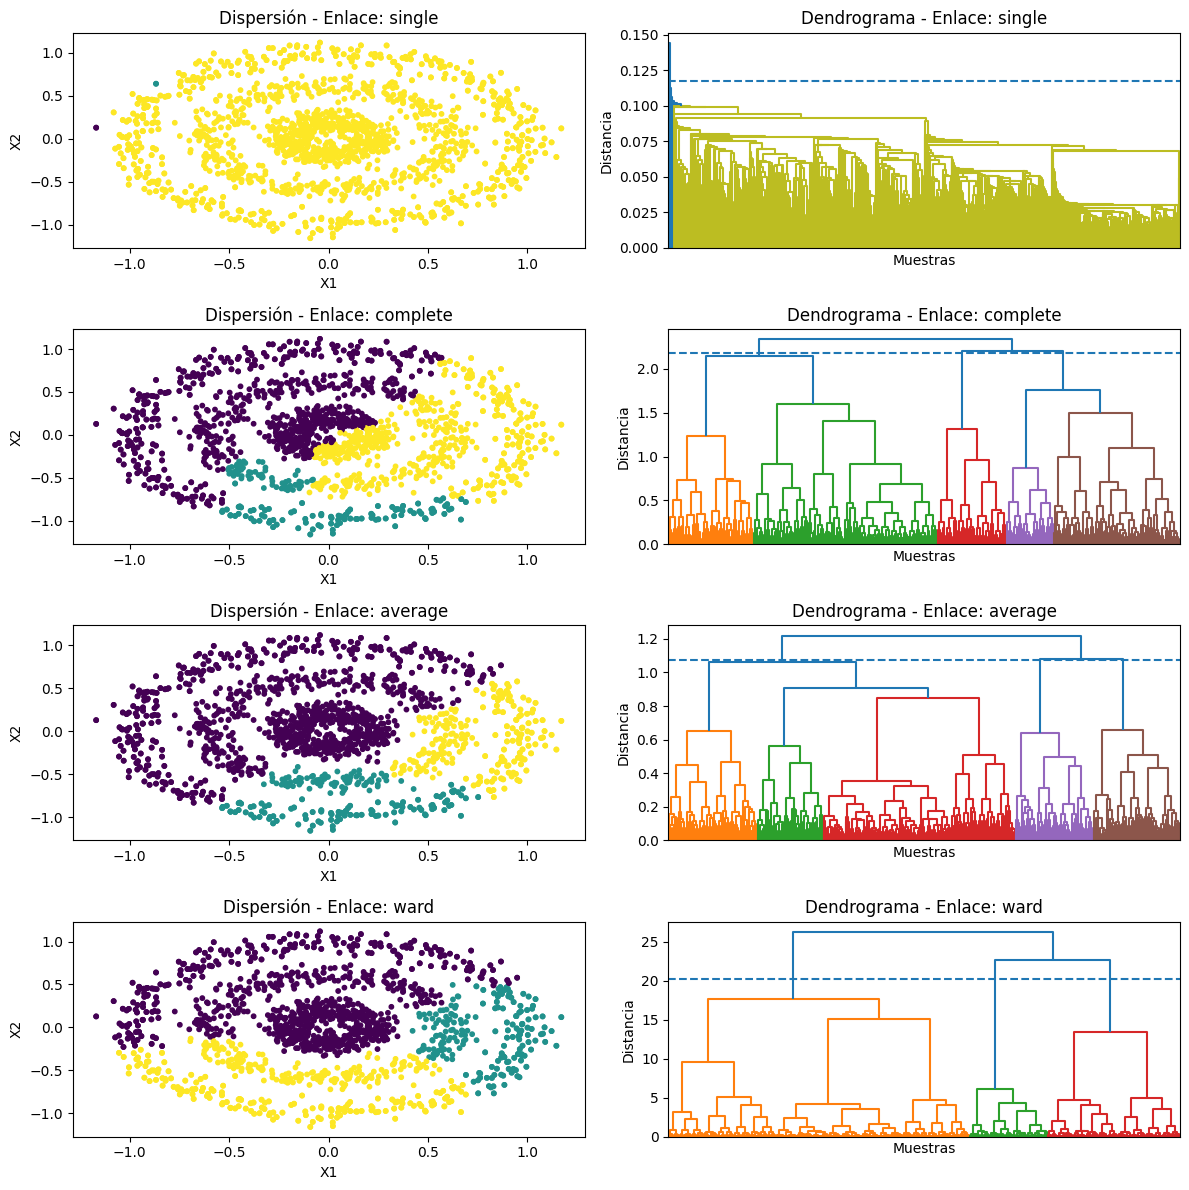

In [24]:
metodos_enlace = ['single', 'complete', 'average', 'ward']

# Figura con 4 filas (métodos) y 2 columnas (scatter / dendrograma)
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, metodo in enumerate(metodos_enlace):
    Z = linkage(X_circles, method=metodo)
    t = (Z[-3, 2] + Z[-2, 2]) / 2
    etiquetas_h = fcluster(Z, t=t, criterion='distance')

    ax_scatter = axes[i, 0]
    ax_scatter.scatter(X_circles[:, 0], X_circles[:, 1], c=etiquetas_h, s=10)
    ax_scatter.set_title(f"Dispersión - Enlace: {metodo}")
    ax_scatter.set_xlabel("X1")
    ax_scatter.set_ylabel("X2")

    ax_dendro = axes[i, 1]
    dendrogram(Z, no_labels=True, ax=ax_dendro)
    ax_dendro.axhline(y=t, linestyle='--')
    ax_dendro.set_title(f"Dendrograma - Enlace: {metodo}")
    ax_dendro.set_xlabel("Muestras")
    ax_dendro.set_ylabel("Distancia")

plt.tight_layout()
plt.show()


La línea horizontal punteada en cada dendrograma marca el umbral de corte,para cada método se construyó el dendrograma con linkage, se realizó un corte horizontal (umbral) para obtener tres clústeres mediante fcluster, y se visualizaron los resultados en un esquema unificado de subplots 4×2.
Con el enlace single, el dendrograma muestra claramente el efecto chaining: el algoritmo va uniendo puntos solo por cercanía mínima y termina formando un clúster muy grande, de ahi en los métodos complete y average, el resultado es más equilibrado y el corte del dendrograma permite obtener tres clústeres distintos y con ward, los clústeres obtenidos son más compactos y bien definidos

### <font color='264CC7'> Comparativo cuantitativo entre métodos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Para cada método (<code>'single'</code>, <code>'complete'</code>, <code>'average'</code>, <code>'ward'</code>):
<ul>
  <li>Calcula y reporta en una <strong>tabla</strong>:
    <ul>
      <li><strong>Silueta promedio</strong> (sobre todos los puntos).</li>
      <li><strong>Tamaños de clúster</strong> (número de puntos por clúster).</li>
    </ul>
  </li>
  <li>Con base en la evidencia cuantitativa, selecciona el método que consideras <strong>más adecuado</strong> y justifica tu elección.
  </li>
</ul>
</div>

In [42]:
resultados = []
for metodo in metodos_enlace:
    Z = linkage(X_circles, method=metodo)
    t = (Z[-3, 2] + Z[-2, 2]) / 2
    etiquetas_h = fcluster(Z, t=t, criterion='distance')
    silueta = silhouette_score(X_circles, etiquetas_h)
    size = pd.Series(etiquetas_h).value_counts().sort_index().values

    resultados.append({
        'Método': metodo,
        'Silueta promedio': silueta,
        'Size': list(tamanos)
    })

tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,Método,Silueta promedio,Size
0,single,0.074550,"[1177, 307, 516]"
1,complete,0.261439,"[1177, 307, 516]"
2,average,0.282569,"[1177, 307, 516]"
3,ward,0.307008,"[1177, 307, 516]"


Con base a la tabla rrealizada el metodo que mejor se estaria ajustando a nuestros datos seria el average ya que este cumple la funcion de presentar una silueta con tamaño de clusters mas equilibrados aunque no se puede decir que este sea un modelo excelente pero es el que mejor metodo se ajusta.


### <font color='264CC7'> Ventaja y desventaja </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong><br>
Responde:
<ul>
  <li><strong>Ventaja:</strong> Explica una ventaja concreta del agrupamiento jerárquico frente a K-Means para este conjunto de datos.
  </li>
  <li><strong>Desventaja:</strong> Explica una desventaja concreta del agrupamiento jerárquico frente a K-Means para este conjunto de datos.
  </li>
</ul>
</div>



Una ventaja que teiene el agrupamiento jerarquic frente al kmeans para este conjunto de datos es que no exige fijar cierto numero de clusters a prioridad es decir es mas libre en vez de lo que ofrece un valor k fijo y pues una desventaja seria que el k means es mas rapido en cierta forma y computacionalmente un agrupamiento jerarquico puede llegar a ser mas costoso.


---
## <font color='264CC7'> Algoritmos basados en densidad: DBSCAN (8 puntos) </font>

### <font color='264CC7'> Ajuste de parámetros y análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Explora el comportamiento de DBSCAN variando el parámetro <code>eps</code>:
    <ul>
      <li>Usa <code>eps ∈ {0.07, 0.08, 0.09, 0.10}</code> manteniendo <code>min_samples = 5</code>.</li>
      <li>Para cada valor, grafica el clustering en una cuadrícula <code>2×2</code> y reporta:
        <ul>
          <li>Número de clústeres encontrados.</li>
          <li>Porcentaje de puntos marcados como ruido (<code>label = -1</code>).</li>
          <li>Silueta promedio calculada solo sobre puntos no-ruido (excluye <code>-1</code>).</li>
        </ul>
      </li>
      <li>Elige el <code>eps</code> que consideres más adecuado y justifícalo integrando evidencia visual y cuantitativa (silueta, no. clústeres, porcentaje de ruido).</li>
    </ul>
</div>

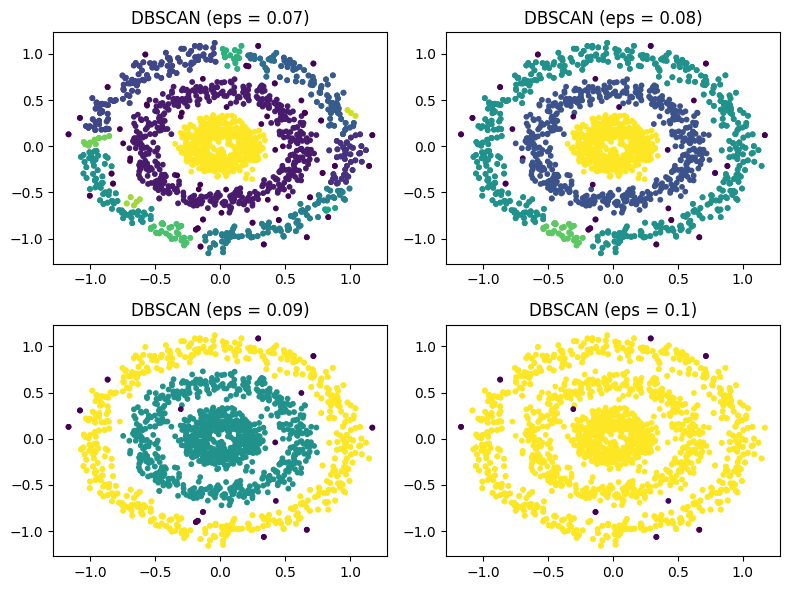

,eps,Número de clústeres,Porcentaje de ruido (%),Silueta promedio
0,0.07,14,3.95,0.044182
1,0.08,4,2.05,-0.031361
2,0.09,2,1.30,0.139598
3,0.10,1,0.80,NaN


In [32]:
eps = [0.07, 0.08, 0.09, 0.10]
min_samples = 5
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
resultados_dbscan = []
for ax, eps in zip(axes.ravel(), eps):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    etiquetas = dbscan.fit_predict(X_circles)

    ax.scatter(
        X_circles[:, 0],
        X_circles[:, 1],
        c=etiquetas,
        s=10)
    ax.set_title(f"DBSCAN (eps = {eps})")
    n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
    porcentaje_ruido = np.mean(etiquetas == -1) * 100
    mask = etiquetas != -1
    if len(set(etiquetas[mask])) > 1:
        silueta = silhouette_score(X_circles[mask], etiquetas[mask])
    else:
        silueta = np.nan

    resultados_dbscan.append({
        'eps': eps,
        'Número de clústeres': n_clusters,
        'Porcentaje de ruido (%)': porcentaje_ruido,
        'Silueta promedio': silueta
    })

plt.tight_layout()
plt.show()
tabla_dbscan = pd.DataFrame(resultados_dbscan)
tabla_dbscan


El valor de eps = 0.08 logra el mejor compromiso entre calidad del agrupamiento, visualmente este se puede ver de una mejor manera de distribucion a los demas datos a la vez que su control del ruido es bueno, por lo que se selecciona como el valor óptimo para DBSCAN en este problema.

### <font color='264CC7'> Profundización en el ajuste de <code>min_samples</code> </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Con el mejor valor de <code>eps</code> encontrado:
<ul>
      <li>Fija el <code>eps</code> elegido en C2.</li>
      <li>Evalúa <code>min_samples ∈ {4, 5, 6, 7}</code>.</li>
      <li>Para cada valor, grafica el resultado y reporta:
        <ul>
          <li>Número de clústeres encontrados.</li>
          <li>Porcentaje de ruido.</li>
        </ul>
      </li>
    </ul>
</div>

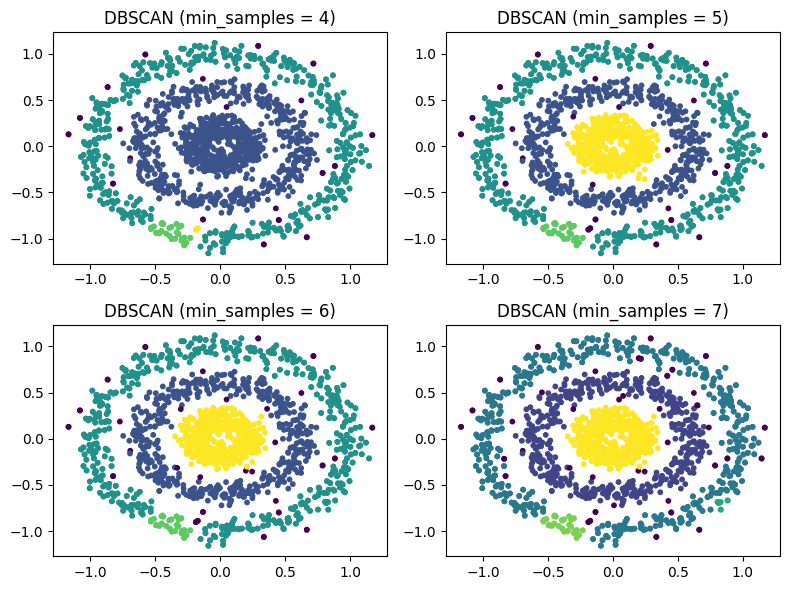

,min_samples,Número de clústeres,Porcentaje de ruido
0,4,4,1.70
1,5,4,2.05
2,6,4,2.25
3,7,5,3.15


In [34]:
eps_fijo = 0.08
valores_min_samples = [4, 5, 6, 7]
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
resultados_min_samples = []
for ax, ms in zip(axes.ravel(), valores_min_samples):
    dbscan = DBSCAN(eps=eps_fijo, min_samples=ms)
    etiquetas = dbscan.fit_predict(X_circles)

    ax.scatter(
        X_circles[:, 0],
        X_circles[:, 1],
        c=etiquetas,
        s=10)
    ax.set_title(f"DBSCAN (min_samples = {ms})")
    n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
    porcentaje_ruido = np.mean(etiquetas == -1) * 100

    resultados_min_samples.append({
        'min_samples': ms,
        'Número de clústeres': n_clusters,
        'Porcentaje de ruido': porcentaje_ruido})
plt.tight_layout()
plt.show()

tabla_min_samples = pd.DataFrame(resultados_min_samples)
tabla_min_samples



Al fijar el eps  de 0.08, el valor min_samples de 5 llega para ofrecer el mejor compromiso entre número de clústeres identificados y porcentaje de ruido, estos valores aunque  menores, son demasiado permisivos mientras que valores mayores incrementan innecesariamente el ruido sin mejorar la estructura del agrupamiento.

### <font color='264CC7'> Análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Reflexiona críticamente sobre los resultados obtenidos:
<ul>
  <li>Describe cómo cambiaron los clústeres y la cantidad de ruido al variar los parámetros <code>eps</code> y <code>min_samples</code>.</li>
  <li>Explica qué configuraciones favorecieron una mejor separación de los clústeres naturales.</li>
  <li>Justifica, con base en las características geométricas del dataset (círculos), por qué DBSCAN puede detectar estructuras que otros métodos como K-Means no identifican adecuadamente.</li>
</ul>
</div>


1. Al ver como cambiaron los clusters y la cantidad de rueda con los distintos parametros se pudo ver que el DBSCAN el factor principal buscaba tanto en valores pequeñs de eps el criterio del vecino mas cercano lo que provoco que muchos puntos se hayan quedado aislados y los mismos hayan sido identificados como ruido, de ahi cuando el eps aumenta, los puntos se conectan con mayor facilidad, disminuye el porcentaje de ruido y los clústeres se vuelven más continuos; por el lado de min_samples, valores bajos hacen que DBSCAN sea más permisivo, permitiendo la formación de clústeres con poca densidad y reduciendo el ruido.
2. DBSCAN resulta especialmente adecuado para este conjunto de datos debido a sus características geométricas, en la que los datos presentan estructuras no convexas en forma de círculos, con densidades relativamente homogéneas a lo largo de cada anillo.

---
<a id="ej2"></a>
# <font color='264CC7'> Ejemplo práctico (25 puntos) </font>

Trabajarás con un subconjunto del conjunto de datos **MNIST**, que contiene imágenes de dígitos escritos a mano. Tu objetivo es aplicar técnicas de *clustering* para agrupar las imágenes según patrones estructurales, sin usar las etiquetas reales.

Utilizarás los siguientes datos (cambia la semilla por los últimos 2 dígitos de tu cédula):

In [36]:
#1750116517
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

# Tomo aleatoriamente 5000 muestras
np.random.seed(17) # Cambiar por último dos dígitos de la cédula
indices = np.random.choice(len(X), 5000, replace=False)
X = X.iloc[indices]
y = y[indices]
# Reinicio los índices
X.reset_index(drop=True, inplace=True)

display(X.head())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color='264CC7'> Introducción y Contexto (2 puntos) </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Investiga:
<ul>
  <li>¿Qué es el dataset MNIST y cuál es su relevancia en la investigación en Machine Learning?</li>
  <li>Describe su estructura: ¿qué representan las filas y las columnas?</li>
  <li>Incluye al menos dos referencias bibliográficas correctamente citadas.</li>
</ul>
</div>


1. **¿Qué es el dataset MNIST y cuál es su relevancia en la investigación en Machine Learning?**
El dataset MNIST (Modified National Institute of Standards and Technology) es un conjunto de datos clásico compuesto por imágenes de dígitos escritos a mano (0–9), este fue diseñado para servir como benchmark en tareas de reconocimiento de patrones y aprendizaje automático, y se ha convertido en un estándar de referencia para evaluar algoritmos de clasificación, reducción de dimensionalidad y, como en este ejercicio, clustering no supervisado.
2. Describe su estructura: ¿qué representan las filas y las columnas?
Filas: **texto en negrita**
Cada fila representa una imagen individual de un dígito manuscrito.

Columnas:
Cada columna corresponde a un píxel de la imagen.
3. Incluye al menos dos referencias bibliográficas correctamente citadas.

LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278–2324.

Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Para poder visualizar los datos, los convertiremos en un formato de imagen.

In [37]:
# Reorganizar los datos para que sean imágenes
n_images = X.shape[0]
X_images = X.to_numpy().reshape(n_images, 28, 28)
X = X_images.reshape(n_images, 28 * 28)

Con esto, podemos visualizar las imágenes de los dígitos y analizar los resultados obtenidos. Por ejemplo:

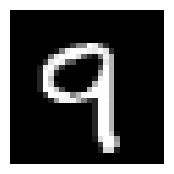

In [39]:
# Graficamos una imagen
plt.figure(figsize=(2, 2))
plt.imshow(X_images[17], cmap='gray') # Cambiar por últimos dígitos de tu cédula
plt.axis('off')
plt.show()

---

## <font color='264CC7'> k-Means (9 puntos) </font>

### <font color='264CC7'> Determinación del número de clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Aplica el método del codo para determinar el número óptimo de clústeres:
<ul>
  <li>Entrena modelos de K-Means para valores de k entre 1 y 20.</li>
  <li>Genera una gráfica de inercia frente al número de clústeres.</li>
  <li>Identifica visualmente el punto del "codo" y selecciona el número óptimo de clústeres.</li>
  <li>Discute:
    <ul>
      <li>¿El número óptimo coincide con el número de dígitos (0–9)?</li>
      <li>¿Qué dificultades podría presentar este conjunto de datos para el método de K-Means?</li>
    </ul>
  </li>
</ul>
</div>

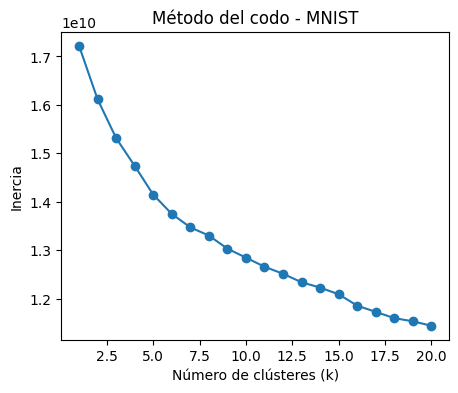

In [40]:
inercias = []
valores_k = range(1, 21)

for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=17)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(5, 4))
plt.plot(valores_k, inercias, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo - MNIST')
plt.show()


El método del codo permite identificar un número razonable de clústeres para MNIST, aunque dicho número no necesariamente coincide con las diez clases reales, esto se debe a la alta dimensionalidad y a la compleja variabilidad geométrica de los dígitos, lo que limita la capacidad de K-Means para capturar correctamente la estructura latente del conjunto de datos sin un preprocesamiento adicional como la reducción de dimensionalidad.

### <font color='264CC7'> Asignación de grupos y visualización </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Asigna los datos a los clústeres obtenidos:
<ul>
  <li>Muestra cinco imágenes aleatorias de cada clúster asignado.</li>
  <li>Organiza las imágenes en una figura clara y etiquetada.</li>
  <li>Para cada clúster, muestra la imagen del centroide correspondiente.</li>
</ul>
</div>

In [44]:
k_opt = 10

kmeans = KMeans(n_clusters=k_opt, random_state=17)
etiquetas = kmeans.fit_predict(X)

centroides = kmeans.cluster_centers_


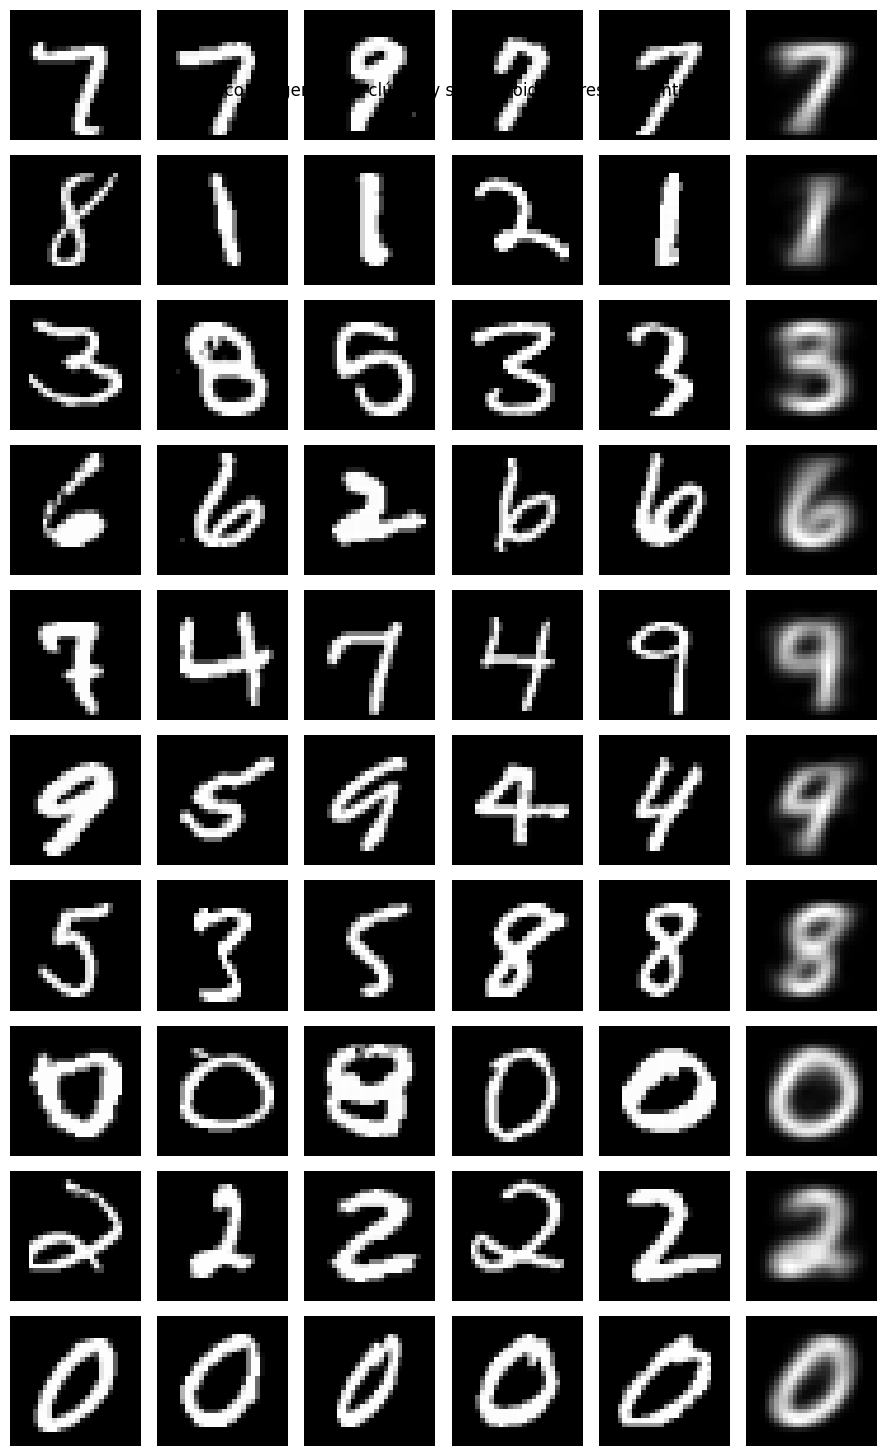

In [45]:
fig, axes = plt.subplots(k_opt, 6, figsize=(9, 1.5 * k_opt))

for c in range(k_opt):

    # Índices de las imágenes del clúster c
    idx_cluster = np.where(etiquetas == c)[0]

    # Selección aleatoria de 5 imágenes del clúster
    seleccion = np.random.choice(idx_cluster, 5, replace=False)

    # Imágenes del clúster
    for j, idx in enumerate(seleccion):
        axes[c, j].imshow(X_images[idx], cmap='gray')
        axes[c, j].axis('off')

    # Imagen del centroide
    centroide_img = centroides[c].reshape(28, 28)
    axes[c, 5].imshow(centroide_img, cmap='gray')
    axes[c, 5].axis('off')

    # Etiqueta del clúster
    axes[c, 0].set_ylabel(f'Clúster {c}', rotation=0, labelpad=40)

plt.suptitle('Cinco imágenes por clúster y su centroide correspondiente', y=0.92)
plt.tight_layout()
plt.show()


### <font color='264CC7'> Descripción de los clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Analiza los grupos formados:
<ul>
  <li>Describe las principales características visuales de cada grupo.</li>
  <li>Asigna un "nombre" representativo a cada clúster (por ejemplo: "número 3 estilizado", "número 8 redondeado", etc.).</li>
</ul>
</div>

### <font color='264CC7'> Evaluación cuantitativa de los clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Evalúa objetivamente la calidad de los clústeres:
<ul>
  <li>Calcula el promedio del índice de silueta para la partición obtenida.</li>
  <li>Interpreta el valor: ¿qué tan compactos y bien separados son los grupos?</li>
</ul>
</div>

---
## <font color='264CC7'> Reducción de dimensiones y k-Means (11 puntos) </font>

### <font color='264CC7'> Reducción de dimensiones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
    Realiza una reducción de dimensiones de los datos utilizando PCA.
<ul>
  <li>Realiza un análisis de componentes principales para 100 componentes y grafica la varianza explicada acumulada.</li>
  <li>Selecciona el número de componentes principales que expliquen al menos el 80% de la varianza.</li>
  <li>Transforma los datos originales en el espacio de las componentes principales.</li>
</ul>
</div>

### <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio  (2 puntos):</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 20.</li>
  <li>Identifica visualmente el «codo» en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>¿Concuerda tu elección con el número de dígitos que se esperan en el conjunto de datos? Explica qué está pasando.</li>
</ul>
</div>

### <font color='264CC7'> Asignación de grupos y análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Muestra 5 integrantes de cada grupo (como imágenes).</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

---
## <font color='264CC7'> Análisis finial (3 puntos) </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
    Realiza un análisis crítico de los resultados obtenidos en los distintos modelos de *clustering*. ¿Qué modelo se ha comportado mejor? ¿Por qué?
</div>


---

### <font color='264CC7'> Bitácora de uso de IA </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
Escribe la bitácora de uso de IA (si la utilizas), en forma de tabla, con los siguientes campos:
<ul>
  <li><strong>Herramienta</strong> (por ejemplo: ChatGPT, Copilot, otra).</li>
  <li><strong>Objetivo</strong> (¿para qué la usaste?).</li>
  <li><strong>Prompt</strong> (resumen del prompt utilizado).</li>
  <li><strong>Verificación propia</strong> (¿qué comprobaste tú? incluye al menos una verificación técnica).</li>
  <li><strong>Correcciones / decisiones</strong> (¿qué ajustaste o corregiste respecto a lo sugerido por la IA?).</li>
</ul>
</div>



**Ejemplo**

| Herramienta    | Objetivo                                                   | Prompt (resumen)                                                        | Verificación propia                                                                                                                                                            | Correcciones / decisiones                                                                                                         |
| -------------- | ---------------------------------------------------------- | ----------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| ChatGPT        | Definir un rango inicial para `eps` en DBSCAN              | “¿Cómo estimar `eps` usando k-distance plot con `min_samples=5`?”       | Generé el k-distance plot (5-NN) y confirmé el “codo” visual; validé el rango probando `eps∈{0.07,0.08,0.09,0.10}` y comparé #clústeres, %ruido y silueta sin ruido            | Ajusté el rango sugerido porque con `eps=0.10` colapsaban clústeres; elegí `eps=0.09` por mejor balance entre %ruido y separación |
